In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [4]:
from sklearn.datasets import load_iris
iris=load_iris()

In [7]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
df=pd.DataFrame(iris.data,columns=["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
final=df.drop(["sepal length (cm)","sepal width (cm)"],axis="columns")
final

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


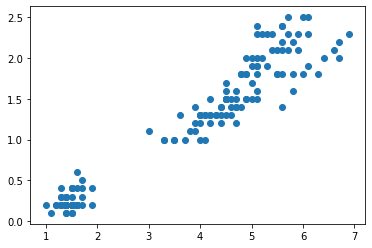

In [16]:
plt.scatter(final["petal length (cm)"],final["petal width (cm)"])

In [31]:
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
y_predicted=km.fit_predict(final[["petal length (cm)"]],final[["petal width (cm)"]])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
final["clusters"]=y_predicted
final

,petal length (cm),petal width (cm),clusters
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


In [34]:
df1=final[final.clusters==1]
df2=final[final.clusters==0]
df3=final[final.clusters==2]

Text(0, 0.5, 'petal width (cm)')

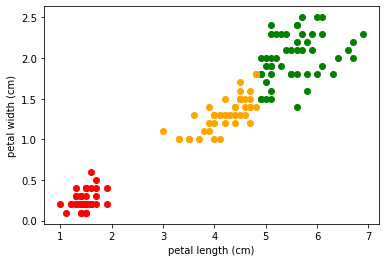

In [35]:
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color="green")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],color="red")
plt.scatter(df3["petal length (cm)"],df3["petal width (cm)"],color="orange")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

In [36]:
km.cluster_centers_

array([[1.462     ],
       [5.55686275],
       [4.22857143]])

In [47]:
k_rng=range(1,10)
SSE=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(final[["petal length (cm)","petal width (cm)"]])
    SSE.append(km.inertia_)

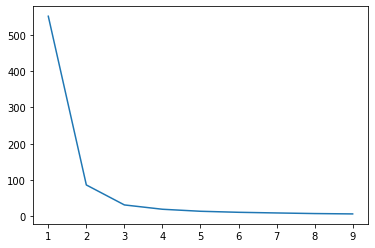

In [48]:
plt.plot(k_rng,SSE)
plt.xlabel("K")
plt.ylabel("SSE")